# PCA on Implied Volatility Surfaces: A Dimensionality Reduction Approach

## 1. **Motivation**

- Options prices are driven by different risk factors, primarily delta and implied volatility (IV).
- IV is not directly observable and encodes deviations from the assumed log-normal return distribution.
- Hedging IV-related risk requires understanding the covariance structure of IV movements.
- Challenges in estimating IV covariance matrices:
  - Measurement noise and bid-ask spreads.
  - Large dimensionality due to multiple strikes and expirations.

## 2. **A Proposed Solution: Dimensionality Reduction**

1. Reduce the dimensionality of the IV surface.
2. Compute the covariance matrix in reduced space.
3. Reconstruct a covariance matrix from the lower-rank factor structure.

## 3. **Simple PCA on Implied Volatility Surfaces**

### **Step 1: Data Acquisition & Preprocessing**

- Pull precomputed IV surfaces from the OptionMetrics database.
  - Identify data anomalies (e.g., IV discrepancies between puts and calls).
  - Justify using only out-of-the-money (OTM) options due to tighter spreads.
  - Discuss the OptionMetrics methodology for generating IV values.
- **Visualization:**
  - 3D plot of IV values interpolated across time-to-maturity and delta.

### **Step 2: IV Surface Exploration**

- Show IV curves across multiple dates and products.
- Identify common patterns in IV movements.

### **Step 3: Running PCA on IV Data**

#### **Task List for Implementing PCA on IV Surfaces in a Jupyter Notebook**

##### **1. Data Preparation**

- Load precomputed IV surfaces from the OptionMetrics database.
- Identify and handle missing or anomalous IV data (e.g., mismatches between put/call IVs).
- Select a subset of options:
  - Focus on OTM options due to tighter bid-ask spreads.
  - Filter options based on liquidity and time-to-maturity thresholds.
- Interpolate IV onto a structured grid:
  - Convert strikes to deltas for a standardized moneyness measure.
  - Interpolate IV values across time-to-maturity and delta dimensions.

##### **2. Data Exploration & Visualization**

- Generate 3D surface plots of IV against delta and time-to-maturity.
- Create time-series plots of IV for different moneyness levels.
- Show IV distributions across maturities to visualize common patterns.
- Examine IV autocorrelation across time and strike price.

##### **3. Construct Data Matrix for PCA**

- Define the data matrix where:
  - Rows correspond to different dates.
  - Columns correspond to IV values for different (delta, time-to-maturity) grid points.
- Normalize the data:
  - Consider standardizing IV values (subtract mean, divide by standard deviation) for better PCA performance.
  - Decide whether to use raw IV values or Vega-weighted IV values.

##### **4. Perform PCA**

- Compute PCA using Singular Value Decomposition (SVD) or a randomized SVD method for efficiency.
- Determine the optimal number of principal components using:
  - Explained variance ratio plots (scree plots).
  - Cumulative variance explained.
- Store factor loadings and principal component scores for later use.

##### **5. Interpret PCA Components**

- Visualize the first few principal components:
  - Plot the first 3-4 components across delta and time-to-maturity.
  - Compare these components to known IV movements (level, skew, curvature).
- Analyze time-series of factor scores:
  - Observe correlations with market volatility indices (e.g., VIX).
  - Detect regime shifts and patterns in factor dynamics.

##### **6. Efficiency Considerations**

- Compare computation time of different PCA implementations:
  - Full SVD vs. truncated SVD vs. randomized SVD.
- Optimize memory usage for handling large IV datasets.

##### **7. Weighting Considerations**

- Compare PCA results in:
  - Raw IV space.
  - Vega-weighted IV space.
- Determine whether weighting improves factor stability and interpretability.

##### **8. Develop Functions for Reproducibility**

- **`load_iv_data()`**: Load and preprocess IV data from OptionMetrics.
- **`interpolate_iv_surface()`**: Interpolate IV onto a structured (delta, time-to-maturity) grid.
- **`visualize_iv_surfaces()`**: Generate 3D plots and time-series IV visualizations.
- **`construct_pca_matrix()`**: Format the IV dataset into a matrix for PCA.
- **`run_pca()`**: Compute PCA using efficient decomposition methods.
- **`plot_pca_components()`**: Visualize principal components across delta/maturity.
- **`analyze_pca_scores()`**: Examine factor score time-series and correlations.
- **`compare_weighted_vs_unweighted_pca()`**: Analyze the effect of Vega-weighting on PCA factors.

This structured approach ensures clarity in performing the PCA analysis while keeping the workflow modular and reusable.

- Construct the IV data matrix for PCA.
- **PCA component interpretation:**
  - First component: Level shifts.
  - Second component: Skew (slope).
  - Third component: Kurtosis (curvature).
  - Fourth component: Higher-order effects.
- **Efficiency considerations:**
  - Compare true SVD vs. randomized SVD implementations.
- **Weighting considerations:**
  - Should we use Vega-weighted covariance matrices?
  - Would results be more generalizable in IV space, applying Vega-weighting only in risk applications?

### **Step 4: Risk Adjustment Using Factor Structure**

1. Compute the covariance matrix in factor space.
2. **Position Visualization:**
   - Heat map of raw risk exposure.
3. **Factor-Based Decomposition:**
   - Show how individual options load onto PCA factors.
   - Aggregate portfolio risk in factor space.
4. **Covariance-Adjusted Risk View:**
   - Convert factor exposures to covariance-adjusted risk.
   - Plot reconstructed portfolio risk.

### **Step 5: Recap and Takeaways**

- The importance of starting with **IV data interpolated onto a consistent delta & time-to-maturity grid**.
- How PCA provides a **simplified view of IV risk**.
- How this approach stabilizes covariance estimates and enables better hedging.

## 4. **Extensions Beyond PCA**

### **1) Functional PCA (FPCA)**

- Parameterizes IV as a function of delta and time-to-maturity.
- Captures additional covariance information between nearby points.

### **2) Instrumented PCA (IPCA)**

- IPCA extends traditional PCA by allowing factor loadings to depend on observable characteristics.
- This enables dynamic adjustments in factor structures based on exogenous variables such as earnings risks, dividend risks, and macroeconomic indicators.
- For example, implied volatility surfaces may exhibit different factor structures around earnings announcements due to shifts in uncertainty and investor sentiment.
- By conditioning on these variables, IPCA provides a more flexible decomposition of implied volatility risk.
- A key question: Can lagged IV surfaces serve as relevant instruments to capture time-dependent market behavior?

### **3) Autoencoders for IV Decomposition**

- Captures nonlinear relationships in IV dynamics.
- Analogous to feature extraction in IV space, allowing for capturing latent structures beyond simple linear factors.

### **4) Transformer-Based IV Modeling**

- Generates potential future IV surfaces in a time-series setting.
- Would transformers be used to predict future IV surfaces, classify market regimes, or generate factor embeddings? How should tokenization, attention, and training mechanisms be designed?

## 5. **Open Questions & Further Considerations**

- How do alternative decomposition methods compare in practice?
- What do we lose in **linearity and portfolio construction properties** when using nonlinear models (FPCA, IPCA, Autoencoders, Transformers)?
- Should PCA be performed in IV space or Vega-weighted space?
- How do PCA-based risk models compare to industry-standard approaches?


In [24]:
import zipfile
import pandas as pd
import os
import glob
from IPython.display import display

# Check if the CSV files already exist
if not glob.glob('testForwards/*.csv'):
  with zipfile.ZipFile('testForwards.zip', 'r') as zip_ref:
    zip_ref.extractall('testForwards')

if not glob.glob('testOptionsIV/*.csv'):
  with zipfile.ZipFile('testOptionsIV.zip', 'r') as zip_ref:
    zip_ref.extractall('testOptionsIV')

# Read the CSV files
forwards_df = pd.read_csv(glob.glob('testForwards/*.csv')[0])
options_iv_df = pd.read_csv(glob.glob('testOptionsIV/*.csv')[0])

forwards_df.drop(columns=['secid', 'cusip', 'issue_type', 'industry_group', 'index_flag', 'issuer', 'sic', 'exchange_d', 'class'], inplace=True)
options_iv_df.drop(columns=['secid', 'cusip', 'issue_type', 'industry_group', 'index_flag', 'class', 'exchange_d'], inplace=True)


/var/folders/cs/glpd34851nxfdyrvjyr6726m0000gn/T/ipykernel_57602/1924522315.py:17: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  forwards_df = pd.read_csv(glob.glob('testForwards/*.csv')[0])
/var/folders/cs/glpd34851nxfdyrvjyr6726m0000gn/T/ipykernel_57602/1924522315.py:18: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  options_iv_df = pd.read_csv(glob.glob('testOptionsIV/*.csv')[0])


In [26]:
# Display the dataframes
forwards_df

,date,expiration,AMSettlement,ForwardPrice,ticker
0,2008-01-02,2008-01-19,0,195.255315,AAPL
1,2008-01-02,2008-02-16,0,195.945523,AAPL
2,2008-01-02,2008-04-19,0,197.390064,AAPL
3,2008-01-02,2008-07-19,0,199.294261,AAPL
4,2008-01-02,2009-01-17,0,202.719938,AAPL
...,...,...,...,...,...
459135,2023-08-31,2024-09-20,0,145.943663,GOOG
459136,2023-08-31,2024-12-20,0,147.938139,GOOG
459137,2023-08-31,2025-01-17,0,148.548923,GOOG
459138,2023-08-31,2025-06-20,0,151.528150,GOOG


In [27]:
options_iv_df

,date,days,delta,impl_volatility,impl_strike,impl_premium,dispersion,cp_flag,ticker
0,2008-01-02,10,-90,NaN,0.00000,0.00000,NaN,P,AAPL
1,2008-01-02,10,-85,NaN,0.00000,0.00000,NaN,P,AAPL
2,2008-01-02,10,-80,NaN,0.00000,0.00000,NaN,P,AAPL
3,2008-01-02,10,-75,NaN,0.00000,0.00000,NaN,P,AAPL
4,2008-01-02,10,-70,NaN,0.00000,0.00000,NaN,P,AAPL
...,...,...,...,...,...,...,...,...,...
10975025,2023-08-31,730,70,0.328910,133.04700,33.39073,0.013395,C,GOOG
10975026,2023-08-31,730,75,0.338229,123.70930,38.62451,0.015454,C,GOOG
10975027,2023-08-31,730,80,0.349134,113.53570,44.82078,0.018904,C,GOOG
10975028,2023-08-31,730,85,0.362052,102.06670,52.36695,0.024315,C,GOOG


,date,expiration,AMSettlement,ForwardPrice,ticker
0,2008-01-02,2008-01-19,0,195.255315,AAPL
1,2008-01-02,2008-02-16,0,195.945523,AAPL
2,2008-01-02,2008-04-19,0,197.390064,AAPL
3,2008-01-02,2008-07-19,0,199.294261,AAPL
4,2008-01-02,2009-01-17,0,202.719938,AAPL
5,2008-01-02,2010-01-16,0,209.596083,AAPL


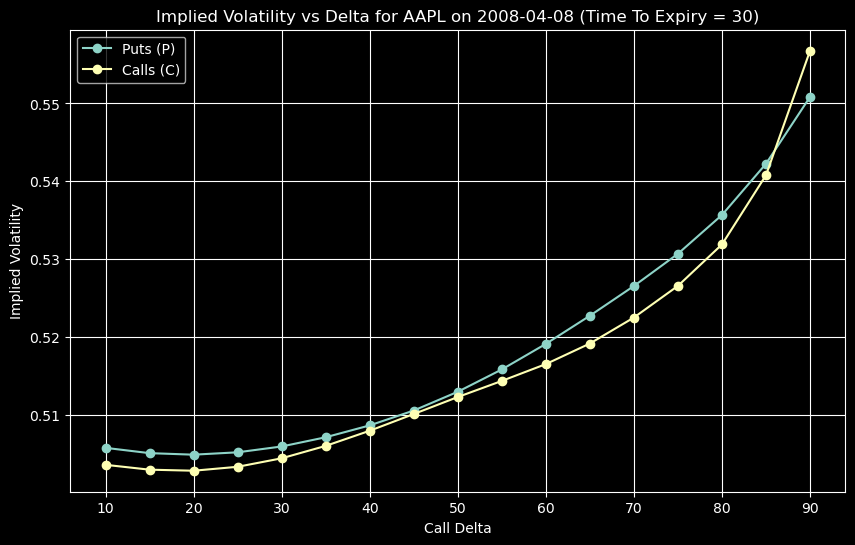

In [42]:
import matplotlib.pyplot as plt

date = '2008-04-08'
days_filter = 30
appl_single_day = options_iv_df.loc[(options_iv_df.ticker == 'AAPL') &( options_iv_df.date == date)].dropna()
forwards_df.loc[(forwards_df.ticker == 'AAPL') & (forwards_df.date == '2008-01-02')].dropna()

# Filter data for puts and calls based on 'days'
puts = appl_single_day[(appl_single_day['cp_flag'] == 'P') & (appl_single_day['days'] == days_filter)].copy()
calls = appl_single_day[(appl_single_day['cp_flag'] == 'C') & (appl_single_day['days'] == days_filter)]

# Adjust delta for puts
puts['delta'] = puts['delta'] + 100

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(puts['delta'], puts['impl_volatility'], label='Puts (P)', marker='o')
plt.plot(calls['delta'], calls['impl_volatility'], label='Calls (C)', marker='o')

plt.xlabel('Call Delta')
plt.ylabel('Implied Volatility')
plt.title(f'Implied Volatility vs Delta for AAPL on {date} (Time To Expiry = {days_filter})')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
options_iv_df.days.unique()

array([ 10,  30,  60,  91, 122, 152, 182, 273, 365, 547, 730])